In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from matplotlib import pyplot as plt

In [2]:
!pwd

/home/karan.verma/analysis_notebooks/vs_lm_analysis/karan/post_decoder_bug_fix_analysis_14Sep2020


# Get Data

In [3]:
oa_ol = pd.read_csv("/shared/suryansh.tiwari/output_csv/HI_FA_prod_voice_search_14th_sep.csv")  # baseline
na_nl = pd.read_csv("/shared/suryansh.tiwari/output_csv/HI_FA_EP6_lm_prod_voice_search_14th_sep.csv")  # best model

In [5]:
na_nl.columns

Index(['Tag', 'Text_id', 'Type_of_text', 'Raw_GT', 'GT', 'GT(english)',
       'utf_text', 'Machine_Transcribed_text',
       'Machine_Transcribed_text(English)', 'GT_len', 'Total_edit', 'WER',
       'WER*GT_len', 'GT_char_len', 'Total_char_edit', 'CER',
       'CER*GT_char_len', 'confidence', 'old_confidence', 'audio_path',
       'HI_FA_EP6', '3'],
      dtype='object')

In [17]:
print((na_nl.GT.str.contains("app_2126583514_3814861637458853888")).any())
print((na_nl.GT.str.contains("app_1154455097_3814861681893310464")).any())
print((na_nl.GT.str.contains("app_1600698360_3814861359451997184")).any())
print((na_nl.GT.str.contains("app_1303368741_3814858571263247360")).any())
print((na_nl.GT.str.contains("app_1600698360_3814861359451997184")).any())
print((na_nl.GT.str.contains("app_743440202_3814390662653018368")).any())
print((na_nl.GT.str.contains("app_1809274779_3815617990192268544")).any())
print((na_nl.GT.str.contains("app_73392447_3814390916240638720")).any())

False
False
False
False
False
False
False
False


# WER/CER

In [5]:
baseline_wer = (oa_ol.groupby(by="Type_of_text")["WER*GT_len"].agg('sum')/oa_ol.groupby(by="Type_of_text")["GT_len"].agg('sum')).reset_index()
baseline_wer.columns = [['Type_of_text', "wer"]]
best_model_wer = (na_nl.groupby(by="Type_of_text")["WER*GT_len"].agg('sum')/na_nl.groupby(by="Type_of_text")["GT_len"].agg('sum')).reset_index()
best_model_wer.columns = [['Type_of_text', "wer"]]

In [6]:
baseline_cer = (oa_ol.groupby(by="Type_of_text")["CER*GT_char_len"].agg('sum')/oa_ol.groupby(by="Type_of_text")["GT_char_len"].agg('sum')).reset_index()
baseline_cer.columns = [['Type_of_text', "cer"]]
best_model_cer = (na_nl.groupby(by="Type_of_text")["CER*GT_char_len"].agg('sum')/na_nl.groupby(by="Type_of_text")["GT_char_len"].agg('sum')).reset_index()
best_model_cer.columns = [['Type_of_text', "cer"]]

In [7]:
na_nl[['CER', 'CER*GT_char_len', 'GT_char_len', 'Machine_Transcribed_text', 'GT']].head(30)

,CER,CER*GT_char_len,GT_char_len,Machine_Transcribed_text,GT
0,0.450000,9.0,20,ओप्पो ए फायर्स मिला थ्री जीबी,ओप्पो ए फाइव नीला _ रंग
1,0.400000,8.0,20,ओप्पो ए फायर्स मिला थ्री जीबी,_ ओप्पो ए फाइव नीला _ रंग _
2,0.000000,0.0,19,रेडमी नोट फाइव प्रो,रेडमी नोट फाइव प्रो
3,0.000000,0.0,16,लेम्बोर्गिनी कार,लेम्बोर्गिनी कार
4,0.000000,0.0,15,आर्मी वाला जूता,आर्मी वाला जूता
5,0.000000,0.0,15,आर्मी वाला जूता,_ आर्मी वाला जूता _
6,0.350000,7.0,20,लव लेसन कार वाकिंग मशीन,लव लेसन करवा की मशीन
7,0.142857,4.0,28,टी वाइ ए ब्लू टाइम स्मार्ट वॉच,टी व्हाई एम यू टाइम स्मार्टवॉच
8,0.142857,4.0,28,टी वाइ ए ब्लू टाइम स्मार्ट वॉच,टी व्हाई एम यू टाइम स्मार्टवॉच _
9,0.000000,0.0,13,जिओ का चार्जर,जिओ का चार्जर


In [8]:
print(len(list('लहंगे बताओ')))

10


In [9]:
print(list('होमेरिक'))

['ह', 'ो', 'म', 'े', 'र', 'ि', 'क']


In [10]:
print(list('हुवेदिक'))

['ह', 'ु', 'व', 'े', 'द', 'ि', 'क']


In [11]:
print(len(list('हुवेदिक')))

7


In [12]:
print(len(list('साड़ियां')))

8


In [13]:
baseline = pd.merge(baseline_wer, baseline_cer, how='inner')
baseline

,Type_of_text,wer,cer
0,multi_speaker,0.330234,0.243654
1,multi_speaker_replaced_by_wildcard,0.207446,0.101205
2,primary_speaker_only,0.180686,0.090902


In [14]:
best_model = pd.merge(best_model_wer, best_model_cer, how='inner')
best_model

,Type_of_text,wer,cer
0,multi_speaker,0.241933,0.155668
1,multi_speaker_replaced_by_wildcard,0.184179,0.093128
2,primary_speaker_only,0.169215,0.085795


# Confidence Plots: Baseline vs BestModel

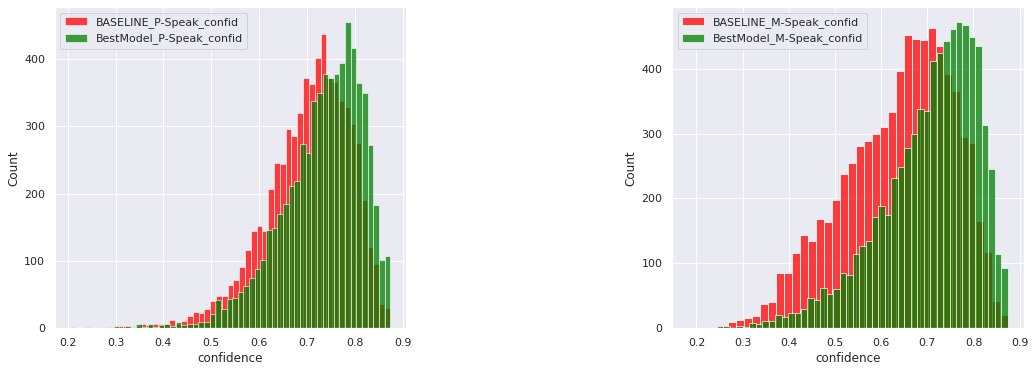

In [15]:
fig, axs = plt.subplots(1,2)

fig.tight_layout(pad=10.0)
fig.set_figheight(8)
fig.set_figwidth(20)

sns.histplot(oa_ol[oa_ol.Type_of_text=="primary_speaker_only"], x="confidence", color="red", label="BASELINE_P-Speak_confid", ax=axs[0])
axs[0].legend(loc="upper left")

sns.histplot(na_nl[na_nl.Type_of_text=="primary_speaker_only"], x="confidence", color="green", label="BestModel_P-Speak_confid", ax=axs[0])
axs[0].legend(loc="upper left")


sns.histplot(oa_ol[oa_ol.Type_of_text=="multi_speaker_replaced_by_wildcard"], x="confidence", color="red", label="BASELINE_M-Speak_confid", ax=axs[1])
axs[1].legend(loc="upper left")

sns.histplot(na_nl[na_nl.Type_of_text=="multi_speaker_replaced_by_wildcard"], x="confidence", color="green", label="BestModel_M-Speak_confid", ax=axs[1])
axs[1].legend(loc="upper left")


# WER Plots: Baseline vs BestModel

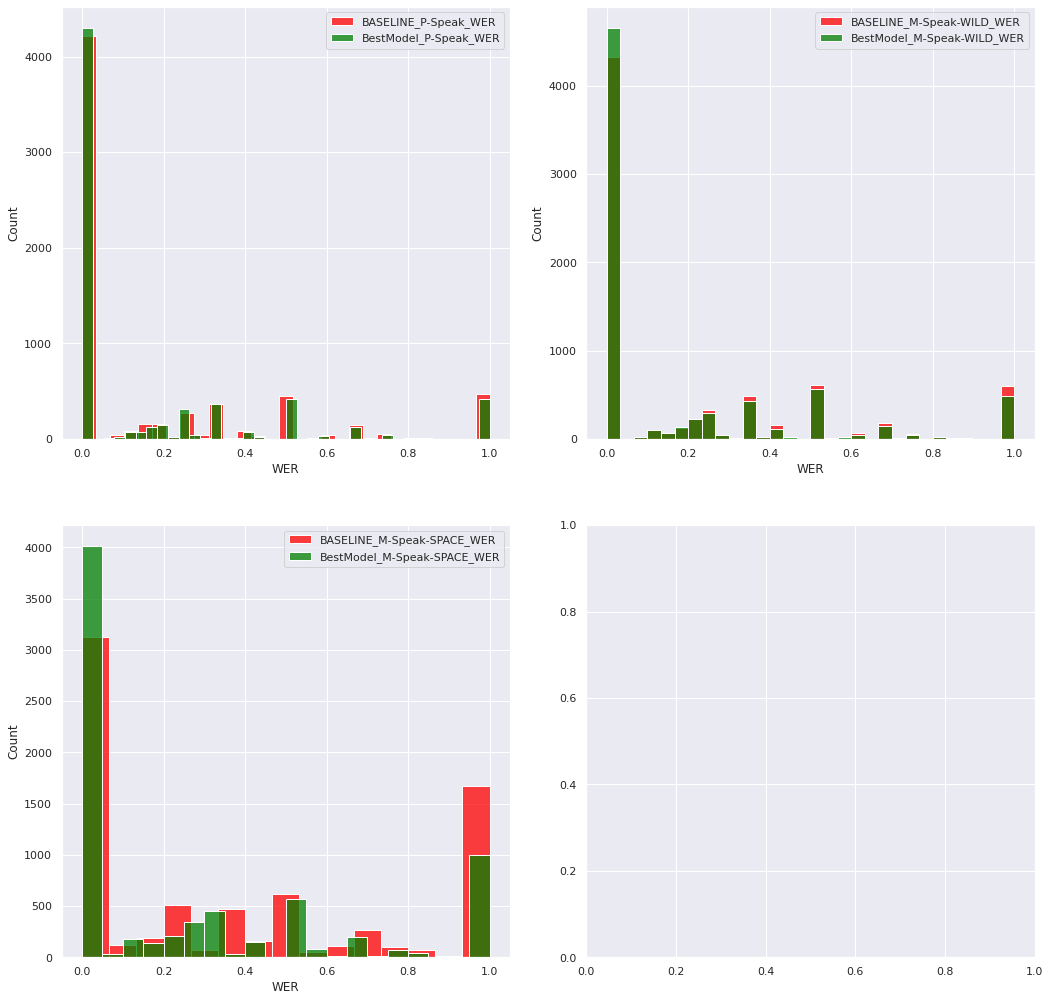

In [16]:
fig, axs = plt.subplots(2,2)

fig.tight_layout(pad=2.0)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.histplot(oa_ol[oa_ol.Type_of_text=="primary_speaker_only"], x="WER", color="red", label="BASELINE_P-Speak_WER", ax=axs[0][0])
axs[0][0].legend(loc="upper right")

sns.histplot(na_nl[na_nl.Type_of_text=="primary_speaker_only"], x="WER", color="green", label="BestModel_P-Speak_WER",ax=axs[0][0])
axs[0][0].legend(loc="upper right")


sns.histplot(oa_ol[oa_ol.Type_of_text=="multi_speaker_replaced_by_wildcard"], x="WER", color="red", label="BASELINE_M-Speak-WILD_WER", ax=axs[0][1])
axs[0][1].legend(loc="upper right")

sns.histplot(na_nl[na_nl.Type_of_text=="multi_speaker_replaced_by_wildcard"], x="WER", color="green", label="BestModel_M-Speak-WILD_WER", ax=axs[0][1])
axs[0][1].legend(loc="upper right")

sns.histplot(oa_ol[oa_ol.Type_of_text=="multi_speaker"], x="WER", color="red", label="BASELINE_M-Speak-SPACE_WER", ax=axs[1][0])
axs[1][0].legend(loc="upper right")

sns.histplot(na_nl[na_nl.Type_of_text=="multi_speaker"], x="WER", color="green", label="BestModel_M-Speak-SPACE_WER", ax=axs[1][0])
axs[1][0].legend(loc="upper right")

# CER Plots: Baseline vs BestModel

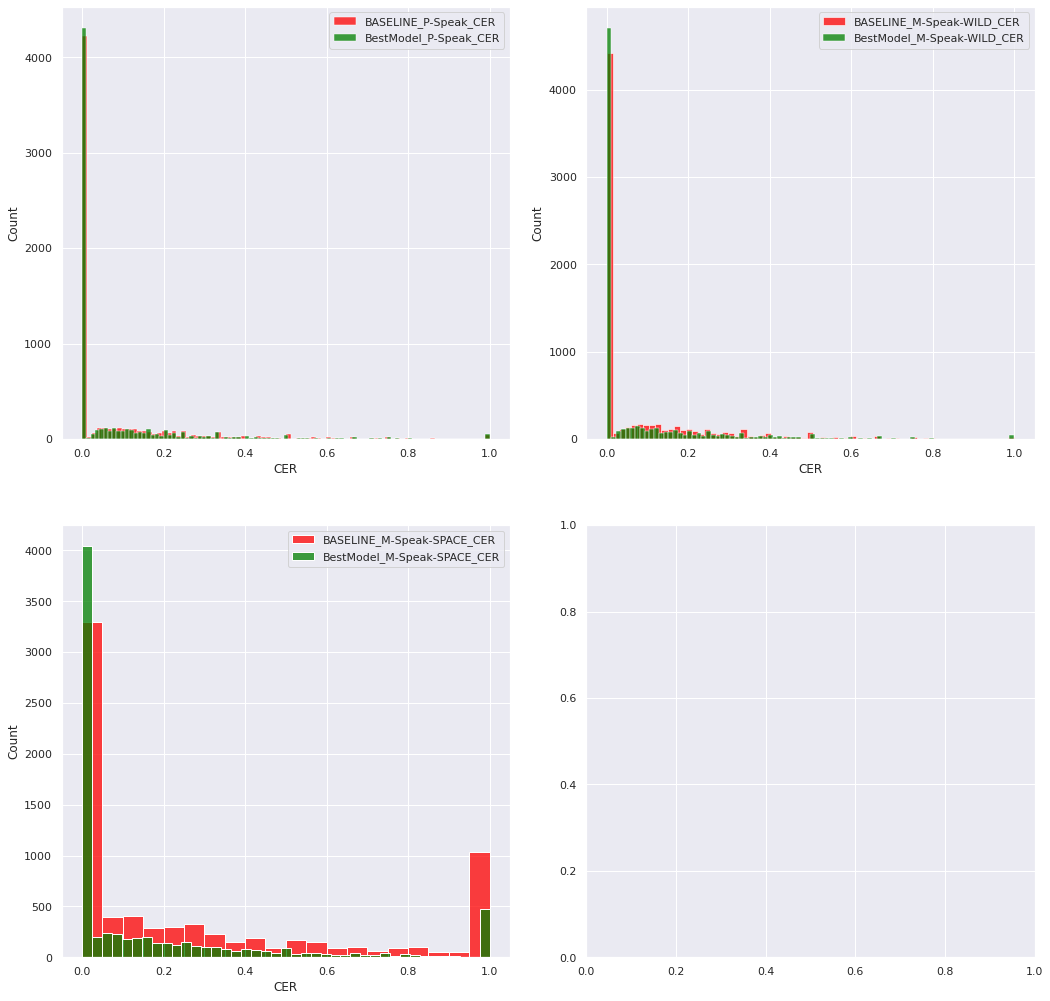

In [17]:
fig, axs = plt.subplots(2,2)

fig.tight_layout(pad=2.0)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.histplot(oa_ol[oa_ol.Type_of_text=="primary_speaker_only"], x="CER", color="red", label="BASELINE_P-Speak_CER", ax=axs[0][0])
axs[0][0].legend(loc="upper right")

sns.histplot(na_nl[na_nl.Type_of_text=="primary_speaker_only"], x="CER", color="green", label="BestModel_P-Speak_CER",ax=axs[0][0])
axs[0][0].legend(loc="upper right")


sns.histplot(oa_ol[oa_ol.Type_of_text=="multi_speaker_replaced_by_wildcard"], x="CER", color="red", label="BASELINE_M-Speak-WILD_CER", ax=axs[0][1])
axs[0][1].legend(loc="upper right")

sns.histplot(na_nl[na_nl.Type_of_text=="multi_speaker_replaced_by_wildcard"], x="CER", color="green", label="BestModel_M-Speak-WILD_CER", ax=axs[0][1])
axs[0][1].legend(loc="upper right")

sns.histplot(oa_ol[oa_ol.Type_of_text=="multi_speaker"], x="CER", color="red", label="BASELINE_M-Speak-SPACE_CER", ax=axs[1][0])
axs[1][0].legend(loc="upper right")

sns.histplot(na_nl[na_nl.Type_of_text=="multi_speaker"], x="CER", color="green", label="BestModel_M-Speak-SPACE_CER", ax=axs[1][0])
axs[1][0].legend(loc="upper right")

# Type of text

In [18]:
oa_ol.Type_of_text.value_counts()

multi_speaker_replaced_by_wildcard    7556
multi_speaker                         7556
primary_speaker_only                  6716
Name: Type_of_text, dtype: int64

# Diving into multispeaker replaced with space data

### Gather data

In [107]:
baseline_mspeak_space = oa_ol[oa_ol.Type_of_text=="multi_speaker"]
best_mspeak_space = na_nl[na_nl.Type_of_text=="multi_speaker"]

In [108]:
baseline_mspeak_space_wer = baseline_mspeak_space[['Text_id', 'Type_of_text', 'Raw_GT', 'GT', 'utf_text', 'Machine_Transcribed_text', 'GT_len', 'WER*GT_len', 'WER', 'old_confidence', 'confidence', 'audio_path']]
best_mspeak_space_wer = best_mspeak_space[['Text_id', 'Type_of_text', 'Raw_GT', 'GT', 'utf_text', 'Machine_Transcribed_text', 'GT_len', 'WER*GT_len', 'WER', 'old_confidence', 'confidence', 'audio_path']]
joined_mspeak_space_wer = pd.merge(baseline_mspeak_space_wer, best_mspeak_space_wer, on='Text_id', how='inner')

In [109]:
baseline_mspeak_space_wer.shape

(7556, 12)

In [110]:
best_mspeak_space_wer.shape

(7557, 12)

In [111]:
joined_mspeak_space_wer.shape

(7555, 23)

In [112]:
(joined_mspeak_space_wer['GT_len_x'] == joined_mspeak_space_wer['GT_len_y']).all()

True

In [113]:
(joined_mspeak_space_wer['GT_x'] == joined_mspeak_space_wer['GT_y']).all()

True

In [114]:
joined_mspeak_space_wer['baseline_char_len'] = joined_mspeak_space_wer.Machine_Transcribed_text_x.dropna().apply(list).apply(len)
joined_mspeak_space_wer['best_char_len'] = joined_mspeak_space_wer.Machine_Transcribed_text_y.dropna().apply(list).apply(len)

<AxesSubplot:xlabel='baseline_char_len', ylabel='best_char_len'>

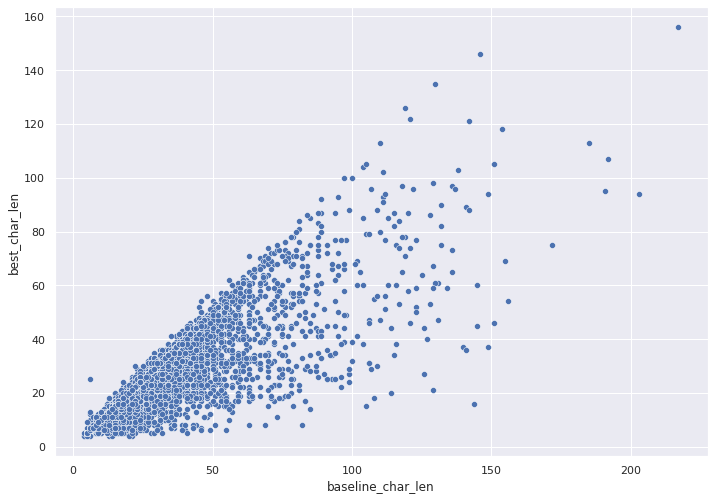

In [115]:
sns.scatterplot(data=joined_mspeak_space_wer, x="baseline_char_len", y="best_char_len")

## Improvement

In [26]:
improved = joined_mspeak_space_wer[joined_mspeak_space_wer['WER_x'] > joined_mspeak_space_wer['WER_y']]
improved.shape

(2088, 23)

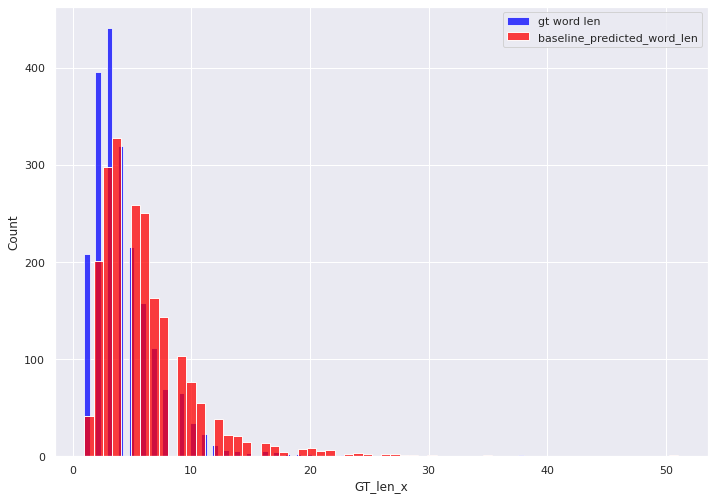

In [48]:
sns.histplot(improved.GT_len_x, color='blue', label='gt word len')
sns.histplot(improved.Machine_Transcribed_text_x.str.split().apply(len), color='red', label='baseline_predicted_word_len')
#sns.histplot(improved.Machine_Transcribed_text_y.dropna().str.split().apply(len), color='green', label='best_predicted_word_len')
plt.legend()

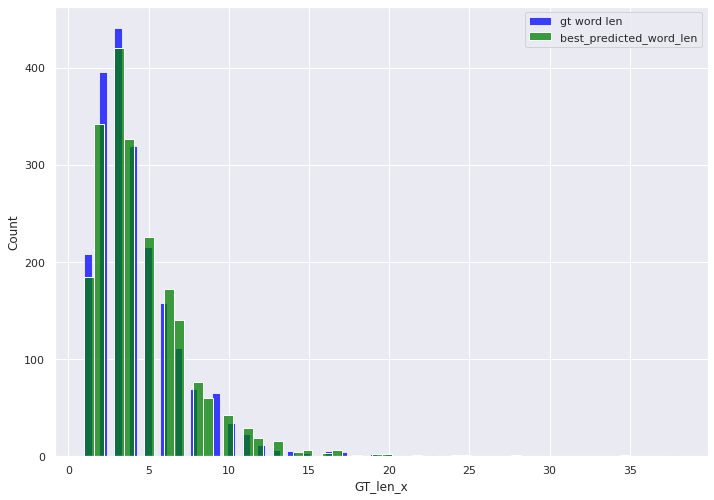

In [49]:
sns.histplot(improved.GT_len_x, color='blue', label='gt word len')
#sns.histplot(improved.Machine_Transcribed_text_x.str.split().apply(len), color='red', label='baseline_predicted_word_len')
sns.histplot(improved.Machine_Transcribed_text_y.dropna().str.split().apply(len), color='green', label='best_predicted_word_len')
plt.legend()

In [27]:
improved_and_zero_wer = improved[(improved['WER_y'] == 0)]
improved_and_zero_wer.shape

(1195, 23)

## Degradation

In [28]:
degraded = joined_mspeak_space_wer[joined_mspeak_space_wer['WER_x'] < joined_mspeak_space_wer['WER_y']]
degraded.shape

(572, 23)

In [116]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', degraded.shape[0]+1)
degraded[['Raw_GT_x', 'GT_x', 'Machine_Transcribed_text_x', 'Machine_Transcribed_text_y']]

,Raw_GT_x,GT_x,Machine_Transcribed_text_x,Machine_Transcribed_text_y
41,@ _ @ कैम्प्स स्पोर्ट शूज @ _ @,कैम्प्स स्पोर्ट शूज,कैम्प्स स्पोर्ट शूज,कैंपर्स स्पोर्ट्स शूज
44,@ _ @ छोटे बच्चों के लिए फ्रॉक नौ से दस साल तक का @ _ @,छोटे बच्चों के लिए फ्रॉक नौ से दस साल तक का,छोटे बच्चों के लिए फ्रॉक नौ से दस साल का,छोटे बच्चों के लिए फ्रॉक नौ से दस साल के
46,@ _ ड्रेस @ मारवाड़ी ड्रेस @ _ नौ _ बताऊ _ @ बोले _ कोई मोबाइल _ @ _ @,मारवाड़ी ड्रेस बोले _ कोई मोबाइल _,बेसबॉल मारवाड़ी ड्रेस घर लेंगे नाटकीय मेन मार्वल की बदावानाहल्ली बोला ऐसा कोई हैंकी डू,रुमाल वाली ड्रेस लेना मन्नाकानाडू
64,स्टैंडर माइक दिखाइए तो @ _ @,स्टैंडर माइक दिखाइए तो,स्टैंडर माइक दिखाइए तुम,स्टैंडर्ड माइक दिखाइए तुम
71,बोलना जी बाहुबली @ _ @,बोलना जी बाहुबली,बोलना जी बाली,बोलना री बाली
74,शेल वर्ची बाहुबली @ _ @,शेल वर्ची बाहुबली,शेल वर्ची बाहली,शेल वर्क बाहली
75,@ जाए @ ब्लैक लाचा @ कहीं प्यार न हो जाए @,ब्लैक लाचा,ब्लैक लाचा,ब्लैक लांचा
81,सोप गरुड़ पर दो @ _ @,सोप गरुड़ पर दो,सोप गड़पा दो,सोप गौड़पाद
100,हाथ में का सस्ता घड़ी और घड़ी व्यापार @ _ @,हाथ में का सस्ता घड़ी और घड़ी व्यापार,हाथ में का सस्ता करी और गाड़ी कारोबार,हाथ में का सस्ता करी और गाड़ी का पर
147,रेडमी के मोबाइल @ _ @,रेडमी के मोबाइल,रेडमी का मोबाइल,रियलमी का मोबाइल


In [30]:
prev_degraded_wer = degraded['WER*GT_len_x'].sum()/degraded['GT_len_x'].sum()
after_degraged_wer = degraded['WER*GT_len_y'].sum()/degraded['GT_len_y'].sum()
print("b4 and after wer: ", prev_degraded_wer, after_degraged_wer)
print("is any of the text string in degraded of zero len: ", (degraded.Machine_Transcribed_text_y.str.len() == 0).any())
print("how many *wer == 1.0* in new model: ", degraded[(degraded.WER_y == 1.0)].shape)


b4 and after wer:  0.23775751435325904 0.47213779128672745
is any of the text string in degraded of zero len:  False
how many *wer == 1.0* in new model:  (106, 23)


### Extreme Degradation

In [31]:
extremely_degraded = degraded[(degraded.WER_y == 1.0) & (degraded.WER_x == 0.0)]
extremely_degraded.shape

(45, 23)

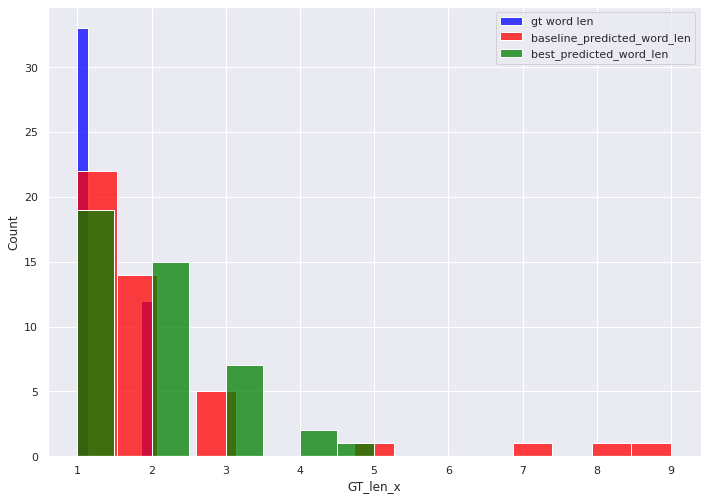

In [32]:
sns.histplot(extremely_degraded.GT_len_x, color='blue', label='gt word len')
sns.histplot(extremely_degraded.Machine_Transcribed_text_x.str.split().apply(len), color='red', label='baseline_predicted_word_len')
sns.histplot(extremely_degraded.Machine_Transcribed_text_y.dropna().str.split().apply(len), color='green', label='best_predicted_word_len')
plt.legend()

In [39]:
#sns.histplot(extremely_degraded.GT_char_len_y, color='blue', label='gt word len')
sns.histplot(extremely_degraded.Machine_Transcribed_text_x.str.apply(list).apply(len), color='red', label='baseline_predicted_word_len')
sns.histplot(extremely_degraded.Machine_Transcribed_text_y.dropna().str.apply(list).apply(len), color='green', label='best_predicted_word_len')
plt.legend()

AttributeError: 'StringMethods' object has no attribute 'apply'

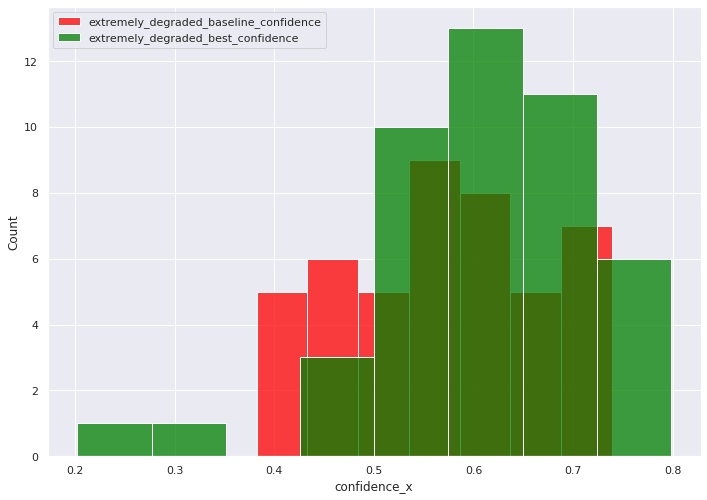

In [108]:
sns.histplot(extremely_degraded.confidence_x, color='red', label='extremely_degraded_baseline_confidence')
sns.histplot(extremely_degraded.confidence_y, color='green', label='extremely_degraded_best_confidence')
plt.legend()

In [102]:
if False:
    extremely_degraded.to_csv('/shared/karan.verma/analysis_production_models/vs_15thSep2020/extremely_degraded_examples_by_15sept2020_model.csv')

## Multi Speaker - No Change Cases wer

In [43]:
no_change = joined_mspeak_space_wer[joined_mspeak_space_wer['WER_x'] == joined_mspeak_space_wer['WER_y']]
no_change.shape

(4895, 23)

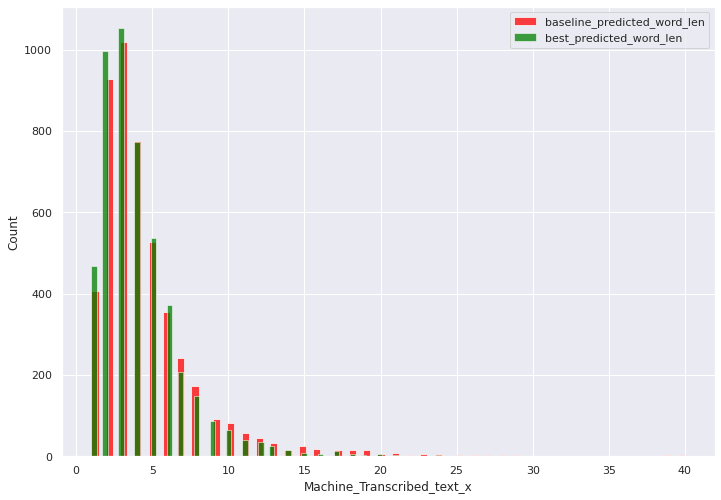

In [45]:
sns.histplot(no_change.Machine_Transcribed_text_x.dropna().str.split().apply(len), color='red', label='baseline_predicted_word_len')
sns.histplot(no_change.Machine_Transcribed_text_y.dropna().str.split().apply(len), color='green', label='best_predicted_word_len')
plt.legend()

In [84]:
no_change[no_change.Machine_Transcribed_text_x == no_change.Machine_Transcribed_text_y][['Machine_Transcribed_text_x', 'Machine_Transcribed_text_y', 'WER_y', 'WER_x', 'GT_y']]

,Machine_Transcribed_text_x,Machine_Transcribed_text_y,WER_y,WER_x,GT_y
1,आर्मी वाला जूता,आर्मी वाला जूता,0.0,0.0,आर्मी वाला जूता
3,जिओ का चार्जर,जिओ का चार्जर,0.0,0.0,जिओ का चार्जर
7,टांगने वाला बैग,टांगने वाला बैग,0.0,0.0,टांगने वाला बैग
10,रिमोट वाला कार दो तीन सौ के,रिमोट वाला कार दो तीन सौ के,0.0,0.0,रिमोट वाला कार दो तीन सौ के
11,हेयर कलर मेट ब्लू,हेयर कलर मेट ब्लू,0.0,0.0,हेयर कलर मेट ब्लू
...,...,...,...,...,...
7544,घड़ी टच वाली,घड़ी टच वाली,0.0,0.0,घड़ी टच वाली
7547,गर्ल्स न्यू फैशन वाचस्,गर्ल्स न्यू फैशन वाचस्,0.0,0.0,गर्ल्स न्यू फैशन वाचस्
7550,टेक्नो पावर पार्क टू मोबाइल,टेक्नो पावर पार्क टू मोबाइल,0.2,0.2,टेक्नो पावर स्पार्क टू मोबाइल
7553,लेडीज जूती सेट सेवन साइज,लेडीज जूती सेट सेवन साइज,0.0,0.0,लेडीज जूती सेट सेवन साइज


In [85]:
no_change[no_change.Machine_Transcribed_text_x != no_change.Machine_Transcribed_text_y]

,Text_id,Type_of_text_x,Raw_GT_x,GT_x,utf_text_x,Machine_Transcribed_text_x,GT_len_x,WER*GT_len_x,WER_x,old_confidence_x,...,Raw_GT_y,GT_y,utf_text_y,Machine_Transcribed_text_y,GT_len_y,WER*GT_len_y,WER_y,old_confidence_y,confidence_y,audio_path_y
0,45160122,multi_speaker,@ गहरी _ @ ओप्पो ए फाइव नीला _ रंग @ _ भांगड़ा...,ओप्पो ए फाइव नीला _ रंग,रीको फायर क्यों नहीं जा त्रीवीक्रमां कयानाकुलम...,कराओके ए फायर्स नीला थ्री वीरेंद्रा क्या हुआ फ...,5,3.0,0.600000,0.383626,...,@ गहरी _ @ ओप्पो ए फाइव नीला _ रंग @ _ भांगड़ा...,ओप्पो ए फाइव नीला _ रंग,रीको फायर क्यों नहीं जा त्रीवीक्रमां कयानाकुलम...,ओप्पो ए फायर्स मिला थ्री जीबी,5,3.0,0.600000,0.383626,0.596144,api_HI_S_29Jul20/app_1520703906_38002119216726...
2,45160160,multi_speaker,टी व्हाई एम यू टाइम स्मार्टवॉच @ _ @,टी व्हाई एम यू टाइम स्मार्टवॉच,टी वाइ ए न्यू टाइम स्मार्ट वॉच,टी वाइ ए न्यू टाइम स्मार्ट वॉच,6,2.0,0.333333,0.651470,...,टी व्हाई एम यू टाइम स्मार्टवॉच @ _ @,टी व्हाई एम यू टाइम स्मार्टवॉच,टी वाइ ए न्यू टाइम स्मार्ट वॉच,टी वाइ ए ब्लू टाइम स्मार्ट वॉच,6,2.0,0.333333,0.651470,0.660073,api_EN_S_29Jul20/app_859062525_380021280332369...
4,45160175,multi_speaker,इनफिनिक्स का फोन टच @ _ @,इनफिनिक्स का फोन टच,इन फ्लेक्स का फोन सर्च,इंफीनिक्स का फोन चार्ज,4,2.0,0.500000,0.630442,...,इनफिनिक्स का फोन टच @ _ @,इनफिनिक्स का फोन टच,इन फ्लेक्स का फोन सर्च,इंफीनिक्स का फोन टॉर्च,4,2.0,0.500000,0.630442,0.744545,api_HI_S_29Jul20/app_1020598548_38002117232400...
5,45160195,multi_speaker,लहंगे बताओ @ _ बताओ @,लहंगे बताओ,लहंगे उन बताओ,लहंगे वन बताओ,2,1.0,0.500000,0.624045,...,लहंगे बताओ @ _ बताओ @,लहंगे बताओ,लहंगे उन बताओ,लहंगे उन बताओ,2,1.0,0.500000,0.624045,0.624505,api_HI_S_29Jul20/app_930255337_380021163510936...
6,45160213,multi_speaker,इनफिनिक्स होम थिएटर @ _ @,इनफिनिक्स होम थिएटर,इन फिनिक्स होम थेटर,इनफीनिक्स होम थेटर,3,1.0,0.333333,0.673401,...,इनफिनिक्स होम थिएटर @ _ @,इनफिनिक्स होम थिएटर,इन फिनिक्स होम थेटर,इनफीनिक्स होम थियेटर,3,1.0,0.333333,0.673401,0.752902,api_HI_S_29Jul20/app_585801316_380021154719675...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,46534127,multi_speaker,तीन सौ में स्कीमी कंपनी की घड़ी ब्लू एंड ब्लैक...,तीन सौ में स्कीमी कंपनी की घड़ी ब्लू एंड ब्लैक...,तीन सौ में स्कीम कंपनी की घड़ी ब्लू एंड ब्लैक ...,तीन सौ में स्कीम कंपनी की घड़ी ब्लू एंड ब्लैक ...,12,1.0,0.083333,0.760468,...,तीन सौ में स्कीमी कंपनी की घड़ी ब्लू एंड ब्लैक...,तीन सौ में स्कीमी कंपनी की घड़ी ब्लू एंड ब्लैक...,तीन सौ में स्कीम कंपनी की घड़ी ब्लू एंड ब्लैक ...,तीन सौ में स्क्रीन कंपनी की घड़ी ब्लू एंड ब्लै...,12,1.0,0.083333,0.760468,0.773920,api_HI_S_08Sep20/app_715522738_383006998664734...
7541,46534140,multi_speaker,@ _ @ पैंट @ पांच साल बच्चे की _ मन _ के साल ब...,पैंट,पैंट का साल अच्छे में साल बस्तारा अरे दस साल क...,पैंट का साल अच्छे में साल बस्तारा अरे दस साल क...,1,1.0,1.000000,0.481421,...,@ _ @ पैंट @ पांच साल बच्चे की _ मन _ के साल ब...,पैंट,पैंट का साल अच्छे में साल बस्तारा अरे दस साल क...,पैंट दस साल बच्चे के साल्सा अरे दस साल के बच्च...,1,1.0,1.000000,0.481421,0.628456,api_HI_S_08Sep20/app_724041822_383006997669845...
7549,46534170,multi_speaker,डल कपड़ा मीटर वाला किलो के हिसाब से @ _ @,डल कपड़ा मीटर वाला किलो के हिसाब से,डायल कपड़ा मीटर वाला किलो के हिसाब से,डायल कपड़ा मीटर वाला किलो के हिसाब से,8,1.0,0.125000,0.698933,...,डल कपड़ा मीटर वाला किलो के हिसाब से @ _ @,डल कपड़ा मीटर वाला किलो के हिसाब से,डायल कपड़ा मीटर वाला किलो के हिसाब से,डॉल कपड़ा मीटर वाला किलो के हिसाब से,8,1.0,0.125000,0.698933,0.737196,api_HI_S_08Sep20/app_1864986168_38300699392349...
7551,46534184,multi_speaker,जींस का पैंट साढ़े चार सौ से स्टार्टिंग @ _ @,जींस का पैंट साढ़े चार सौ से स्टार्टिंग,जींस का पैंट साढ़े चार सौ से स्टार्टिंग लगाती ...,जींस का पैंट साढ़े चार सौ से स्टार्टिंग लगाती ...,8,8.0,1.000000,0.659982,...,जींस का पैंट साढ़े चार सौ से स्टार्टिंग @ _ @,जींस का पैंट साढ़े चार सौ से स्टार्टिंग,जींस का पैंट साढ़े चार सौ से स्टार्टिंग लगाती ...,जींस का पैंट साढ़े चार सौ से स्टार्टिंग लगाती ...,8,8.0,1.000000,0.659982,0.710115,api_HI_S_08Sep20/app_

In [47]:
no_change_wer_but_change_in_transcribed_text = no_change[no_change.Machine_Transcribed_text_x != no_change.Machine_Transcribed_text_y]

<AxesSubplot:xlabel='confidence_x', ylabel='Count'>

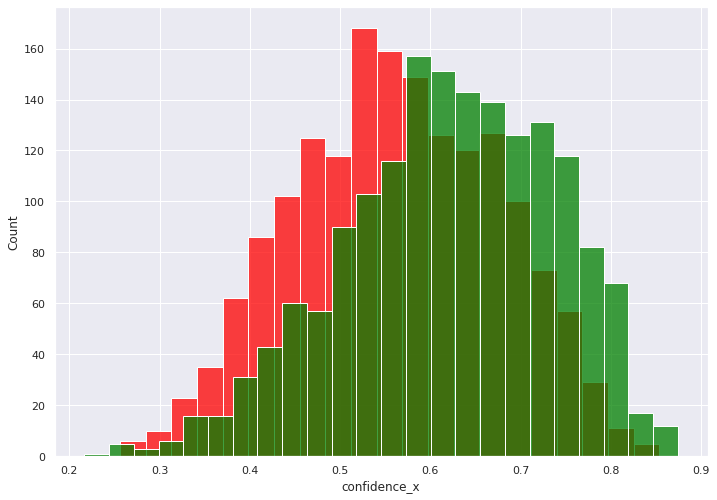

In [109]:
sns.histplot(no_change_wer_but_change_in_transcribed_text.confidence_x, color='red')
sns.histplot(no_change_wer_but_change_in_transcribed_text.confidence_y, color='green')

In [54]:
no_change_wer_no_change_in_ptext = no_change[no_change.Machine_Transcribed_text_x == no_change.Machine_Transcribed_text_y]


<AxesSubplot:xlabel='confidence_x', ylabel='Count'>

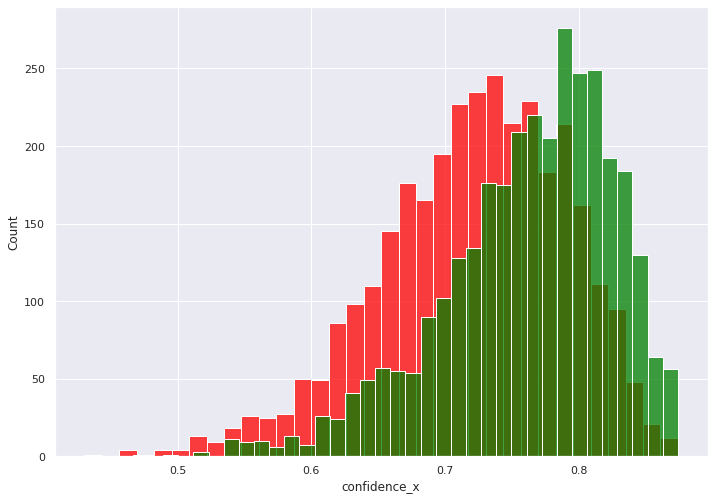

In [110]:
sns.histplot(no_change_wer_no_change_in_ptext.confidence_x, color='red')
sns.histplot(no_change_wer_no_change_in_ptext.confidence_y, color='green')

## Primary Speaker

In [118]:
baseline_pspeak = oa_ol[oa_ol.Type_of_text=="primary_speaker_only"]
best_pspeak = na_nl[na_nl.Type_of_text=="primary_speaker_only"]

In [119]:
baseline_pspeak.head()

,Tag,Text_id,Type_of_text,Raw_GT,GT,GT(english),utf_text,Machine_Transcribed_text,Machine_Transcribed_text(English),GT_len,...,WER*GT_len,GT_char_len,Total_char_edit,CER,CER*GT_char_len,confidence,old_confidence,audio_path,HI_FA,2
2,287,45160124,primary_speaker_only,रेडमी नोट फाइव प्रो,रेडमी नोट फाइव प्रो,redmi note five pro,रेडमी नोट फाइव प्रो,रेडमी नोट फाइव प्रो,redmi note five pro,4,...,0.0,19,0.0,0.000000,0.0,0.831673,0.770339,api_HI_S_29Jul20/app_1493192009_3800211917822230784.flac,NaN,NaN
3,287,45160125,primary_speaker_only,लेम्बोर्गिनी कार,लेम्बोर्गिनी कार,lamborghini car,लेम्बोर्गिनी कार,लेम्बोर्गिनी कार,lamborghini car,2,...,0.0,16,0.0,0.000000,0.0,0.701957,0.721852,api_EN_S_29Jul20/app_1532878730_3800212845736493312.flac,NaN,NaN
6,287,45160143,primary_speaker_only,लव लेसन करवा की मशीन,लव लेसन करवा की मशीन,love lesson karwa ki machine,लव लेसन करवा की मशीन,लव लेसन कर बाकी मशीन,love lesson kar baaki machine,5,...,2.0,20,3.0,0.150000,3.0,0.549616,0.577485,api_HI_S_29Jul20/app_1701963696_3800211855973023744.flac,NaN,NaN
13,287,45160180,primary_speaker_only,पबजी तौलिया,पबजी तौलिया,पबजी tauliya,पब जी तो लिया,पबजी तो लिया,पबजी to liya,2,...,2.0,11,2.0,0.181818,2.0,0.602700,0.570250,api_EN_S_29Jul20/app_112680905_3800212739025010688.flac,NaN,NaN
14,287,45160184,primary_speaker_only,बेबी मोटरसाइकिल्स,बेबी मोटरसाइकिल्स,baby motorcycles,बेबी मोटरसाइकिल,बेबी मोटरसाइकिल,baby motorcycle,2,...,1.0,17,2.0,0.117647,2.0,0.797570,0.736690,api_EN_S_29Jul20/app_1741641744_3800212728413421824.flac,NaN,NaN


In [120]:
baseline_pspeak_wer = baseline_pspeak[['Text_id', 'Type_of_text', 'Raw_GT', 'GT', 'utf_text', 'Machine_Transcribed_text', 'GT_len', 'WER*GT_len', 'WER', 'old_confidence', 'confidence', 'audio_path', 'GT_char_len']]
best_pspeak_wer = best_pspeak[['Text_id', 'Type_of_text', 'Raw_GT', 'GT', 'utf_text', 'Machine_Transcribed_text', 'GT_len', 'WER*GT_len', 'WER', 'old_confidence', 'confidence', 'audio_path', 'GT_char_len']]
joined_pspeak_space_wer = pd.merge(baseline_pspeak_wer, best_pspeak_wer, on='Text_id', how='inner')

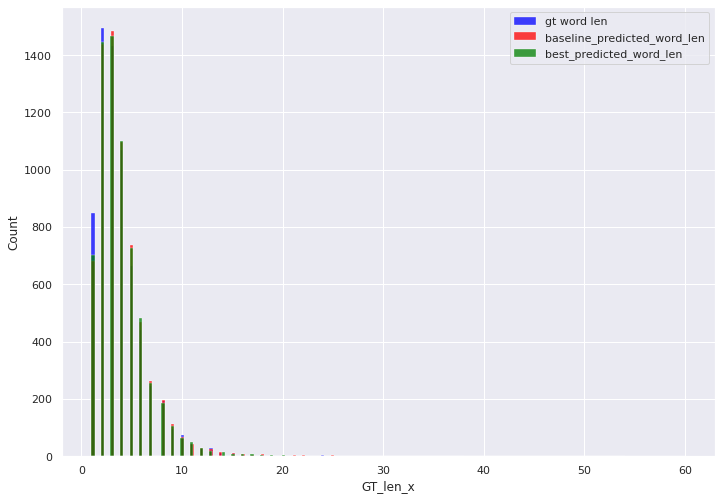

In [121]:
sns.histplot(joined_pspeak_space_wer.GT_len_x, color='blue', label='gt word len')
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_x.dropna().str.split().apply(len), color='red', label='baseline_predicted_word_len')
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_y.dropna().str.split().apply(len), color='green', label='best_predicted_word_len')
plt.legend()

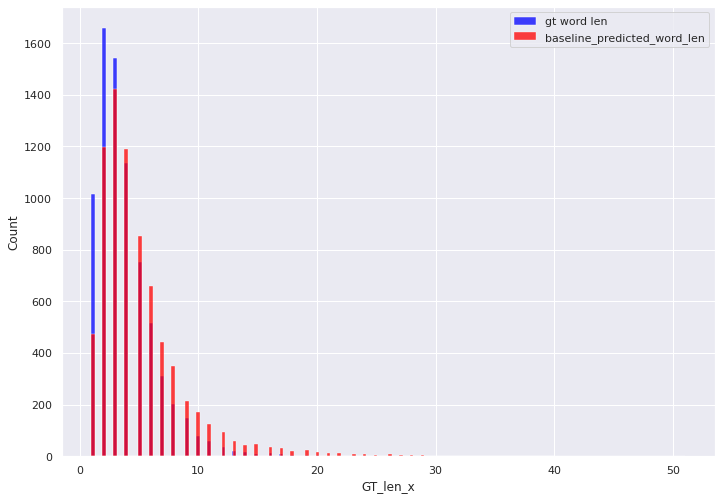

In [122]:
sns.histplot(joined_mspeak_space_wer.GT_len_x, color='blue', label='gt word len')
sns.histplot(joined_mspeak_space_wer.Machine_Transcribed_text_x.dropna().str.split().apply(len), color='red', label='baseline_predicted_word_len')
#sns.histplot(joined_mspeak_space_wer.Machine_Transcribed_text_y.dropna().str.split().apply(len), color='green', label='best_predicted_word_len')
plt.legend()

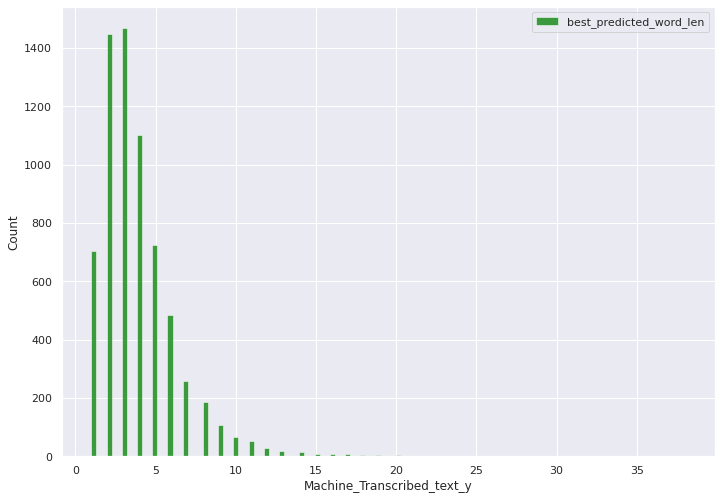

In [123]:
#sns.histplot(joined_mspeak_space_wer.GT_len_x, color='blue', label='gt word len')
#sns.histplot(joined_mspeak_space_wer.Machine_Transcribed_text_x.dropna().str.split().apply(len), color='red', label='baseline_predicted_word_len')
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_y.dropna().str.split().apply(len), color='green', label='best_predicted_word_len')
plt.legend()

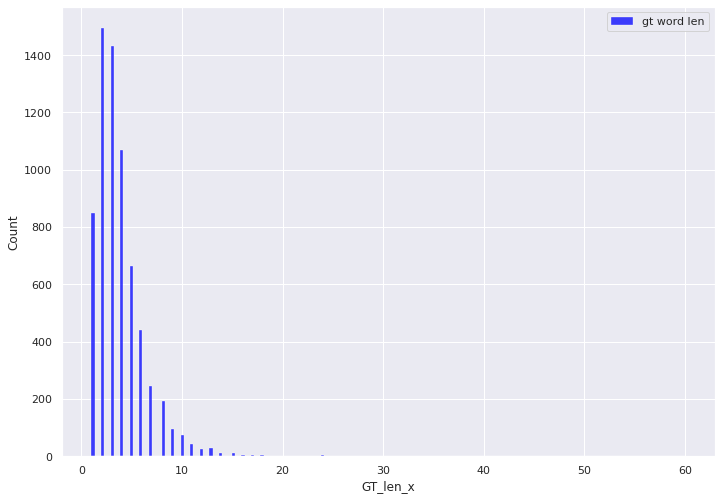

In [124]:
sns.histplot(joined_pspeak_space_wer.GT_len_x, color='blue', label='gt word len')
plt.legend()

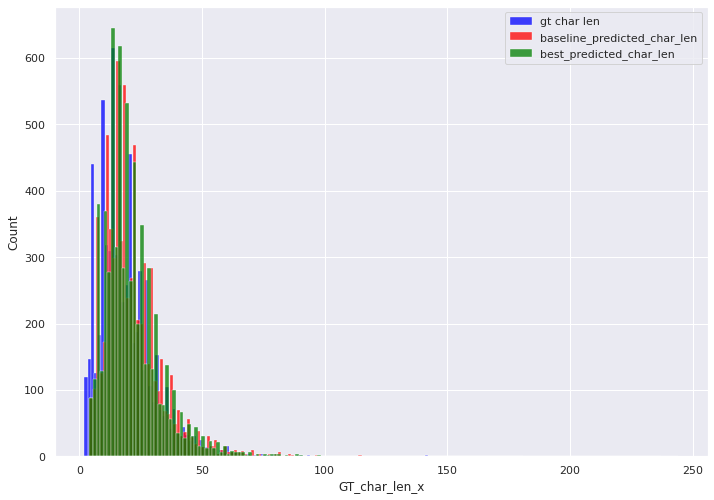

In [125]:
sns.histplot(joined_pspeak_space_wer.GT_char_len_x, color='blue', label='gt char len')
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_x.dropna().apply(list).apply(len), color='red', label='baseline_predicted_char_len')
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_y.dropna().apply(list).apply(len), color='green', label='best_predicted_char_len')
plt.legend()

<AxesSubplot:xlabel='Machine_Transcribed_text_x', ylabel='Count'>

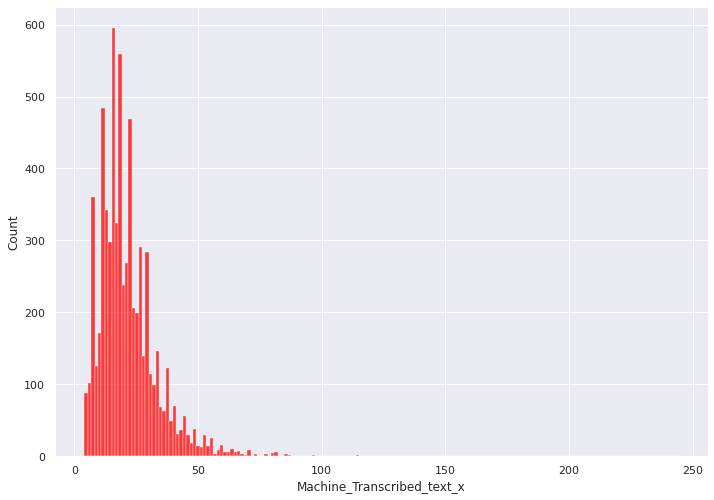

In [126]:
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_x.dropna().apply(list).apply(len), color='red', label='baseline_predicted_word_len')

<AxesSubplot:xlabel='Machine_Transcribed_text_x', ylabel='Count'>

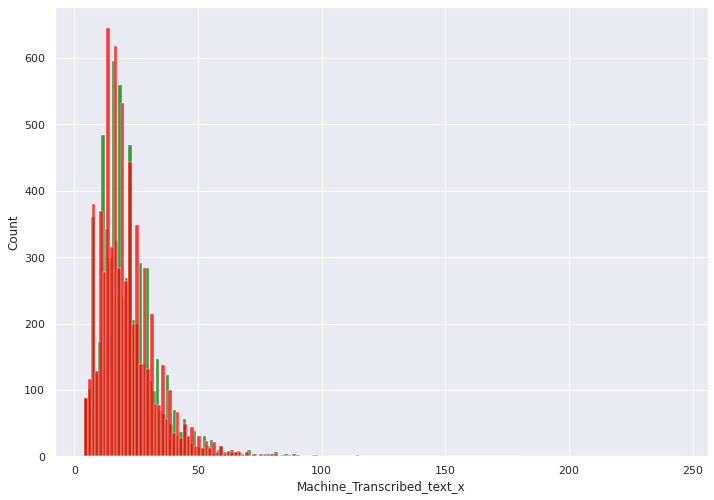

In [127]:
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_x.dropna().apply(list).apply(len), color='green', label='best_predicted_word_len')
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_y.dropna().apply(list).apply(len), color='red', label='baseline_predicted_word_len')

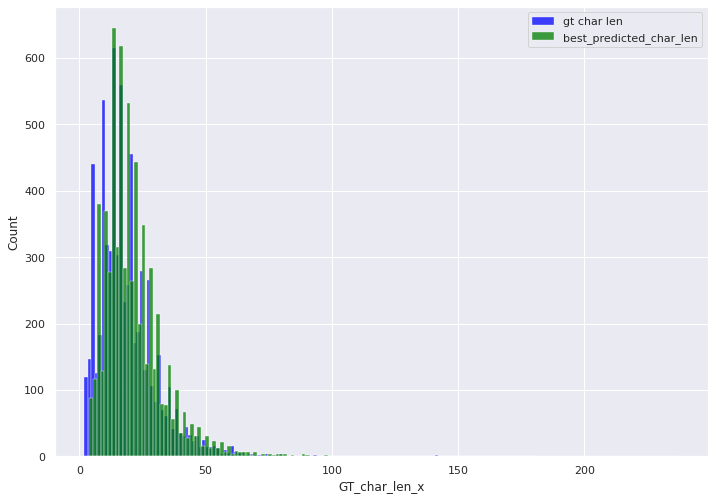

In [143]:
sns.histplot(joined_pspeak_space_wer.GT_char_len_x, color='blue', label='gt char len')
#sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_x.dropna().apply(list).apply(len), color='red', label='baseline_predicted_char_len')
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_y.dropna().apply(list).apply(len), color='green', label='best_predicted_char_len')
plt.legend()

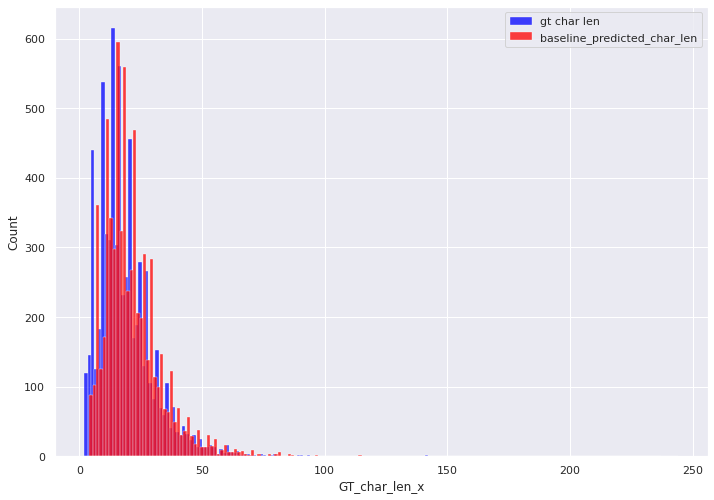

In [144]:
sns.histplot(joined_pspeak_space_wer.GT_char_len_x, color='blue', label='gt char len')
sns.histplot(joined_pspeak_space_wer.Machine_Transcribed_text_x.dropna().apply(list).apply(len), color='red', label='baseline_predicted_char_len')
#sns.histplot(joined_mspeak_space_wer.Machine_Transcribed_text_y.dropna().apply(list).apply(len), color='green', label='best_predicted_char_len')
plt.legend()

In [145]:
joined_pspeak_space_wer['baseline_char_len'] = joined_pspeak_space_wer.Machine_Transcribed_text_x.dropna().apply(list).apply(len)
joined_pspeak_space_wer['best_char_len'] = joined_pspeak_space_wer.Machine_Transcribed_text_y.dropna().apply(list).apply(len)

In [146]:
joined_pspeak_space_wer.head()

,Text_id,Type_of_text_x,Raw_GT_x,GT_x,utf_text_x,Machine_Transcribed_text_x,GT_len_x,WER*GT_len_x,WER_x,old_confidence_x,...,Machine_Transcribed_text_y,GT_len_y,WER*GT_len_y,WER_y,old_confidence_y,confidence_y,audio_path_y,GT_char_len_y,baseline_char_len,best_char_len
0,45160124,primary_speaker_only,रेडमी नोट फाइव प्रो,रेडमी नोट फाइव प्रो,रेडमी नोट फाइव प्रो,रेडमी नोट फाइव प्रो,4,0.0,0.0,0.770339,...,रेडमी नोट फाइव प्रो,4,0.0,0.0,0.770339,0.861194,api_HI_S_29Jul20/app_1493192009_3800211917822230784.flac,19,21.0,21.0
1,45160125,primary_speaker_only,लेम्बोर्गिनी कार,लेम्बोर्गिनी कार,लेम्बोर्गिनी कार,लेम्बोर्गिनी कार,2,0.0,0.0,0.721852,...,लेम्बोर्गिनी कार,2,0.0,0.0,0.721852,0.789018,api_EN_S_29Jul20/app_1532878730_3800212845736493312.flac,16,18.0,18.0
2,45160143,primary_speaker_only,लव लेसन करवा की मशीन,लव लेसन करवा की मशीन,लव लेसन करवा की मशीन,लव लेसन कर बाकी मशीन,5,2.0,0.4,0.577485,...,लव लेसन कार वाकिंग मशीन,5,2.0,0.4,0.577485,0.573106,api_HI_S_29Jul20/app_1701963696_3800211855973023744.flac,20,22.0,25.0
3,45160180,primary_speaker_only,पबजी तौलिया,पबजी तौलिया,पब जी तो लिया,पबजी तो लिया,2,2.0,1.0,0.570250,...,पबजी तो लिया,2,2.0,1.0,0.570250,0.611618,api_EN_S_29Jul20/app_112680905_3800212739025010688.flac,11,14.0,14.0
4,45160184,primary_speaker_only,बेबी मोटरसाइकिल्स,बेबी मोटरसाइकिल्स,बेबी मोटरसाइकिल,बेबी मोटरसाइकिल,2,1.0,0.5,0.736690,...,बेबी मोटरसाइकिल,2,1.0,0.5,0.736690,0.823756,api_EN_S_29Jul20/app_1741641744_3800212728413421824.flac,17,17.0,17.0


<AxesSubplot:xlabel='baseline_char_len', ylabel='best_char_len'>

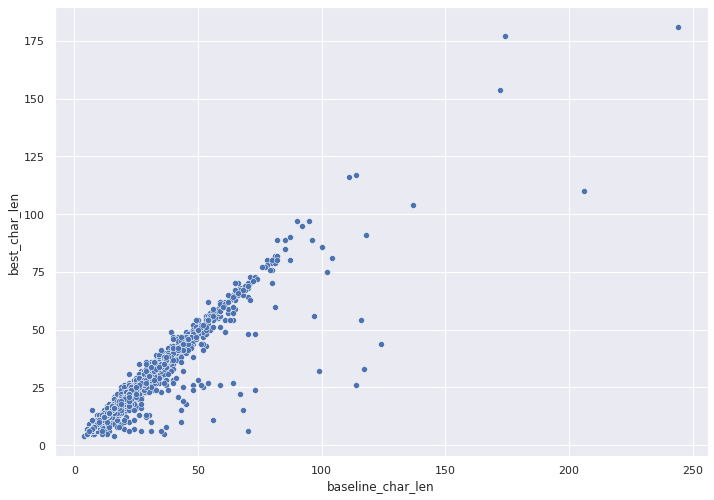

In [147]:
sns.scatterplot(data=joined_pspeak_space_wer, x="baseline_char_len", y="best_char_len")

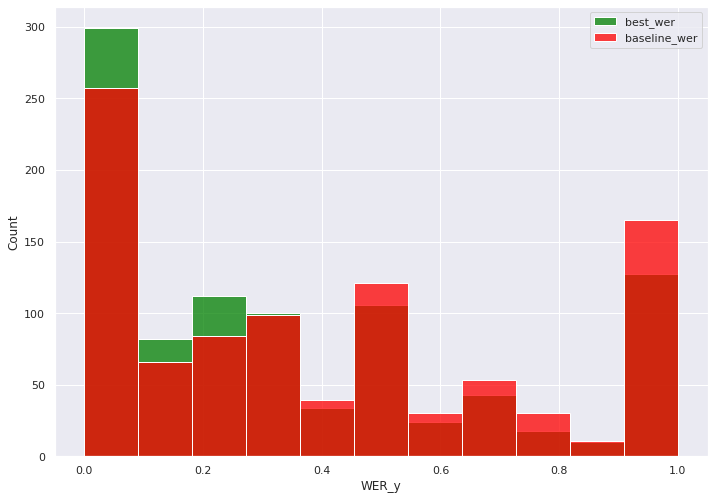

In [139]:
g = joined_pspeak_space_wer[joined_pspeak_space_wer.baseline_char_len > joined_pspeak_space_wer.best_char_len][['WER_x', 'WER_y']]
sns.histplot(g.WER_y, color='green', label='best_wer')
sns.histplot(g.WER_x, color='red', label='baseline_wer')
plt.legend()

<AxesSubplot:xlabel='WER_y', ylabel='Count'>

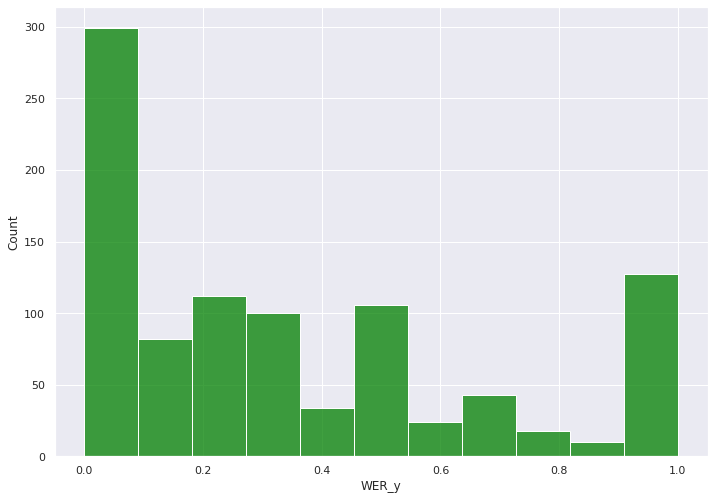

In [140]:
sns.histplot(g.WER_y, color='green', label='best_wer')